In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
train=pd.read_csv("train.csv")

In [7]:
train.shape

(40000, 15)

In [8]:
train.sample(6)

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
8198,8198,182823.0,0.129767,0.552229,0.408603,0.001827,8.0,0.121666,-10.089854,0,0.053136,72.827448,3,0.376511,1
19696,19696,NaN,0.807487,0.454245,0.610185,0.003569,2.0,0.131556,-10.409419,1,0.020975,146.670708,4,0.776706,1
16108,16108,202093.0,0.527150,0.580347,NaN,0.001458,0.0,0.174014,-7.292848,0,0.034165,100.079649,3,0.960013,1
23584,23584,157583.0,0.939299,NaN,0.227660,0.005036,2.0,0.121194,-22.149781,0,0.059115,94.379351,3,0.209124,0
6056,6056,187327.0,0.041109,0.608166,NaN,0.000794,9.0,0.375867,-3.042639,0,0.184129,178.770142,3,0.861490,1
14168,14168,170251.0,0.012890,0.306953,NaN,0.974540,10.0,0.153533,-23.727370,1,0.045598,97.260060,3,0.433507,1


In [ ]:
We have 3 categorical variables: key, audio_mode, time_signature. The other features are continuous

In [9]:
#Missing Values
train.isnull().sum()

id                     0
song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

In [ ]:
There are many missing Values. We are going to have to perform some imputation.

In [10]:
#Descriptive Statistics
train.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,40000.00000,35899.000000,36008.000000,35974.000000,36025.000000,36015.000000,35935.000000,35914.000000,36043.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,193165.847572,0.276404,0.570951,0.683932,0.036527,5.042605,0.198514,-7.407596,0.321150,0.094107,116.562815,3.394375,0.580645,0.364400
std,11547.14972,45822.127679,0.297928,0.190010,0.212662,0.150024,3.372728,0.151670,3.877198,0.466924,0.083591,26.167911,0.524405,0.237351,0.481268
min,0.00000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-32.117911,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,9999.75000,166254.500000,0.039618,0.424760,0.539276,0.000941,2.000000,0.111796,-9.578139,0.000000,0.038500,96.995309,3.000000,0.398669,0.000000
50%,19999.50000,186660.000000,0.140532,0.608234,0.704453,0.001974,5.000000,0.135945,-6.345413,0.000000,0.055881,113.795959,3.000000,0.598827,0.000000
75%,29999.25000,215116.000000,0.482499,0.718464,0.870503,0.003225,8.000000,0.212842,-4.620711,1.000000,0.118842,128.517383,4.000000,0.759635,1.000000
max,39999.00000,491671.000000,1.065284,0.957131,1.039741,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,219.163578,5.000000,1.022558,1.000000


In [11]:
#Are there duplicate values ?
train.duplicated().sum()



0

In [ ]:
train.corr()["song_popularity"]



/home/christian/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='key', ylabel='count'>

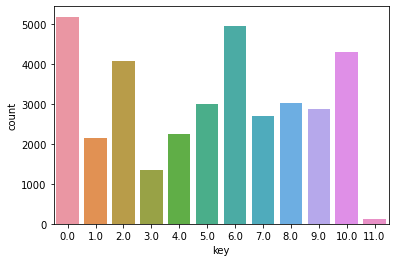

In [12]:
sns.countplot(train["key"])



/home/christian/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='audio_mode', ylabel='count'>

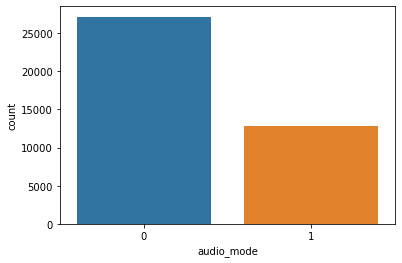

In [13]:
sns.countplot(train["audio_mode"])

/home/christian/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_signature', ylabel='count'>

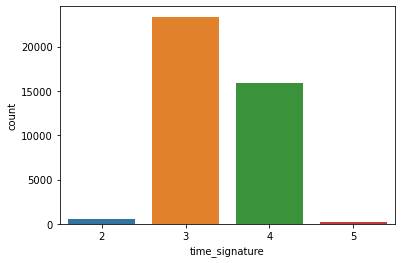

In [14]:
sns.countplot(train["time_signature"])